In [1]:
# Plot all plots with the same samples
# Plot solution samples
from sp_6_helper import *
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
mesh_resolution = 14
mesh_resolutionE = 6
mesh_resolutionVBar = 6
randomFieldVBar = calculate_randomFieldVBar(mesh_resolutionVBar)
randomFieldE = calculate_randomFieldE(mesh_resolutionE)

In [2]:
print(f"Eigenvalues of randomFieldVBar: {randomFieldVBar.eigenvalues.shape}")
print(f"Shape of eigenvectors: {randomFieldVBar.eigenvectors.shape}") # (2M, M)
M_max = randomFieldVBar.eigenvalues.shape[0]

def get_max_perturbation_for_M(M: int):
    return np.sqrt(3) * np.sum([np.sqrt(randomFieldVBar.eigenvalues[m]) * np.max(np.abs(randomFieldVBar.eigenvectors[:, m])) for m in range(M)])

M_array = np.arange(0, M_max)
for M in M_array:
    print(f"m: {M+1}, perturbation: {get_max_perturbation_for_M(M)}")

Eigenvalues of randomFieldVBar: (128,)
Shape of eigenvectors: (256, 128)
m: 1, perturbation: 0.0
m: 2, perturbation: 0.029807444100570686
m: 3, perturbation: 0.05427883035317867
m: 4, perturbation: 0.06049639475366193
m: 5, perturbation: 0.06648990851997844
m: 6, perturbation: 0.06962891346198248
m: 7, perturbation: 0.07265653185059143
m: 8, perturbation: 0.07316937842660882
m: 9, perturbation: 0.07367100900488023
m: 10, perturbation: 0.07394965102818844
m: 11, perturbation: 0.07407668167520066
m: 12, perturbation: 0.07420433433175393
m: 13, perturbation: 0.07425202191158911
m: 14, perturbation: 0.07429970949142428
m: 15, perturbation: 0.07433661542197394
m: 16, perturbation: 0.07436417804110684
m: 17, perturbation: 0.07438784327789201
m: 18, perturbation: 0.07441150851467718
m: 19, perturbation: 0.07442580784231158
m: 20, perturbation: 0.07444010716994597
m: 21, perturbation: 0.07445187111713757
m: 22, perturbation: 0.07446363506432918
m: 23, perturbation: 0.07447519062529052
m: 24, p

In [49]:
omega1 = sample_omega1(randomFieldE)
omega2 = sample_omega2(randomFieldVBar)
q = sample_q()

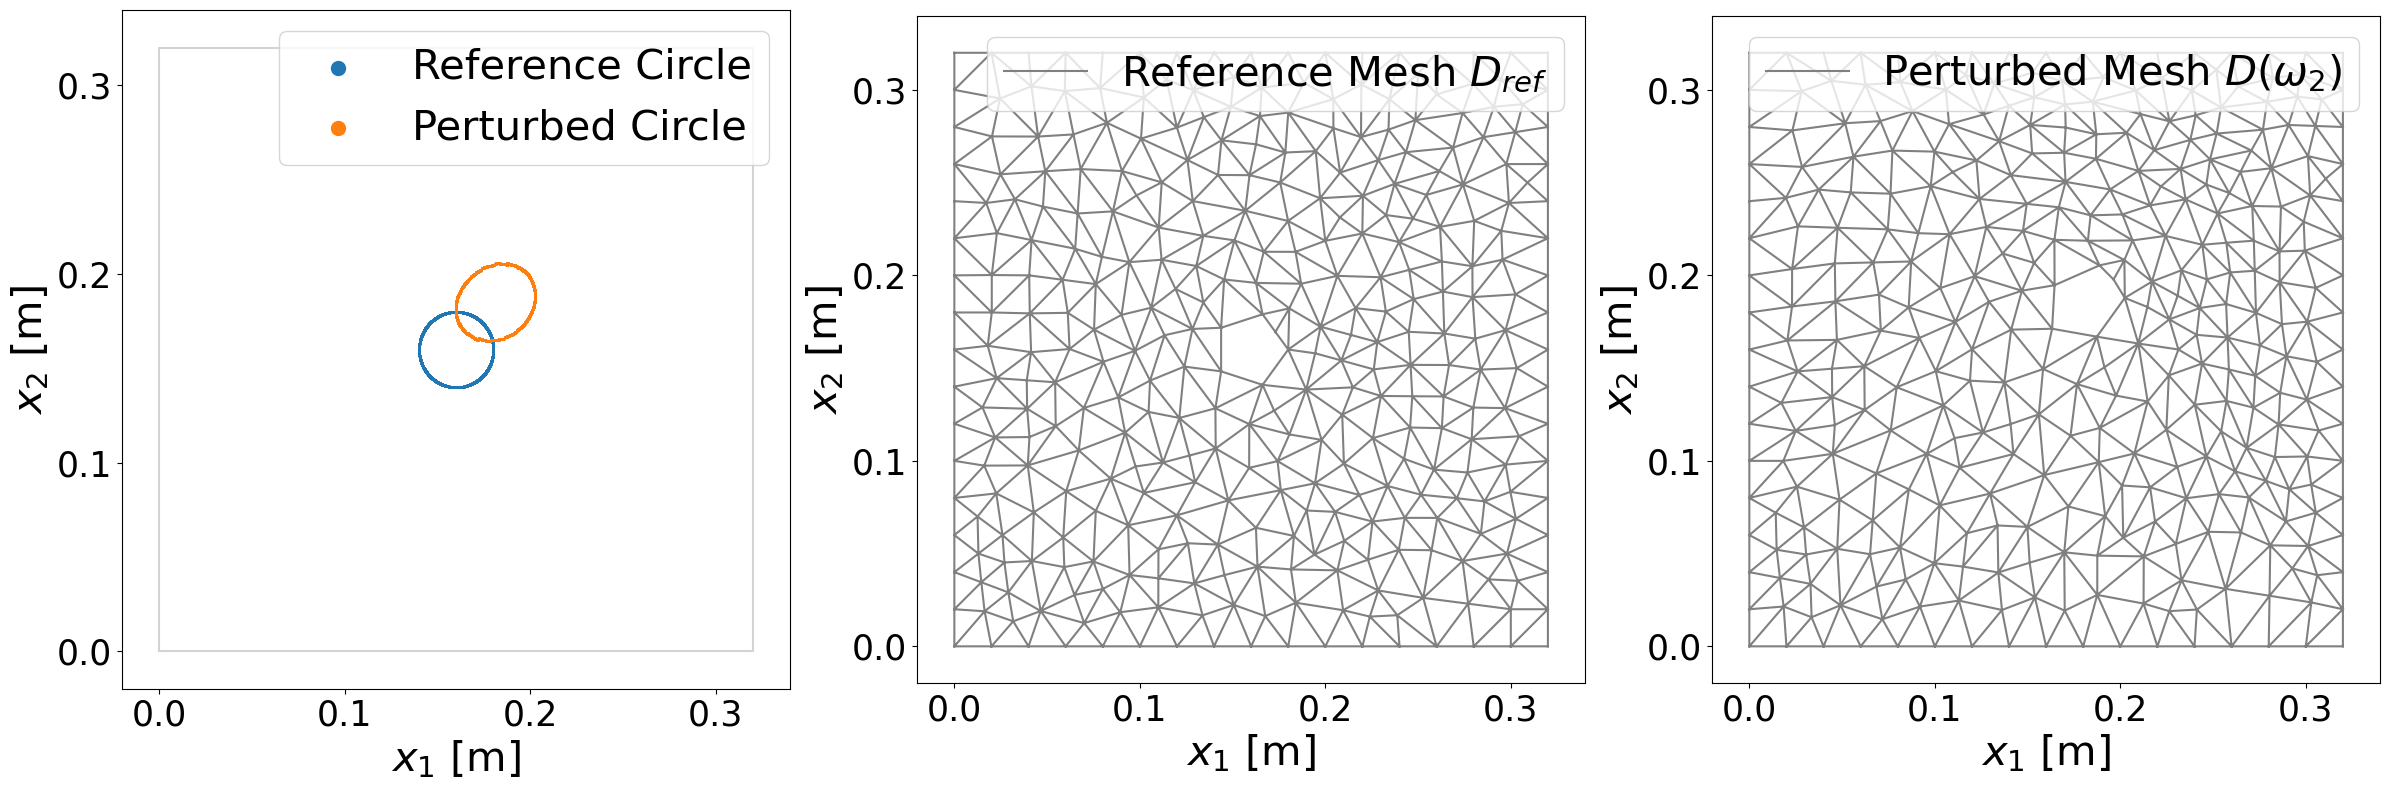

In [ ]:
# plot name: perturbed_mesh_sample_circle_random_field.png

r = 0.02
mesh = create_reference_mesh(mesh_resolution)
perturbed_mesh = perturb_mesh(mesh, omega2, r, randomFieldVBar)

# Create points on the circle
thetas = np.linspace(0, 2 * np.pi, 5000)
circle_points = np.array([0.16 + 0.02 * np.cos(thetas), 0.16 + 0.02 * np.sin(thetas)]).T
perturbed_circle_points = np.array([perturbation_function(circle_point, omega2, r, randomFieldVBar) for circle_point in circle_points])


# Plots
plt.figure(figsize=(24, 8))

# Plot circle and perturbed points
ax = plt.subplot(1, 3, 1)
plt.scatter(circle_points[:, 0], circle_points[:, 1], label='Reference Circle', s=1)
plt.scatter(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], label='Perturbed Circle', s=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30, markerscale=10)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 3, 2)
fe.plot(mesh, label=r'Reference Mesh $D_{ref}$')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 3, 3)
fe.plot(perturbed_mesh, label=r'Perturbed Mesh $D(\omega_2)$')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()


Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1191 nodes for 596 points.
Time for one sample: 47.06 seconds
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


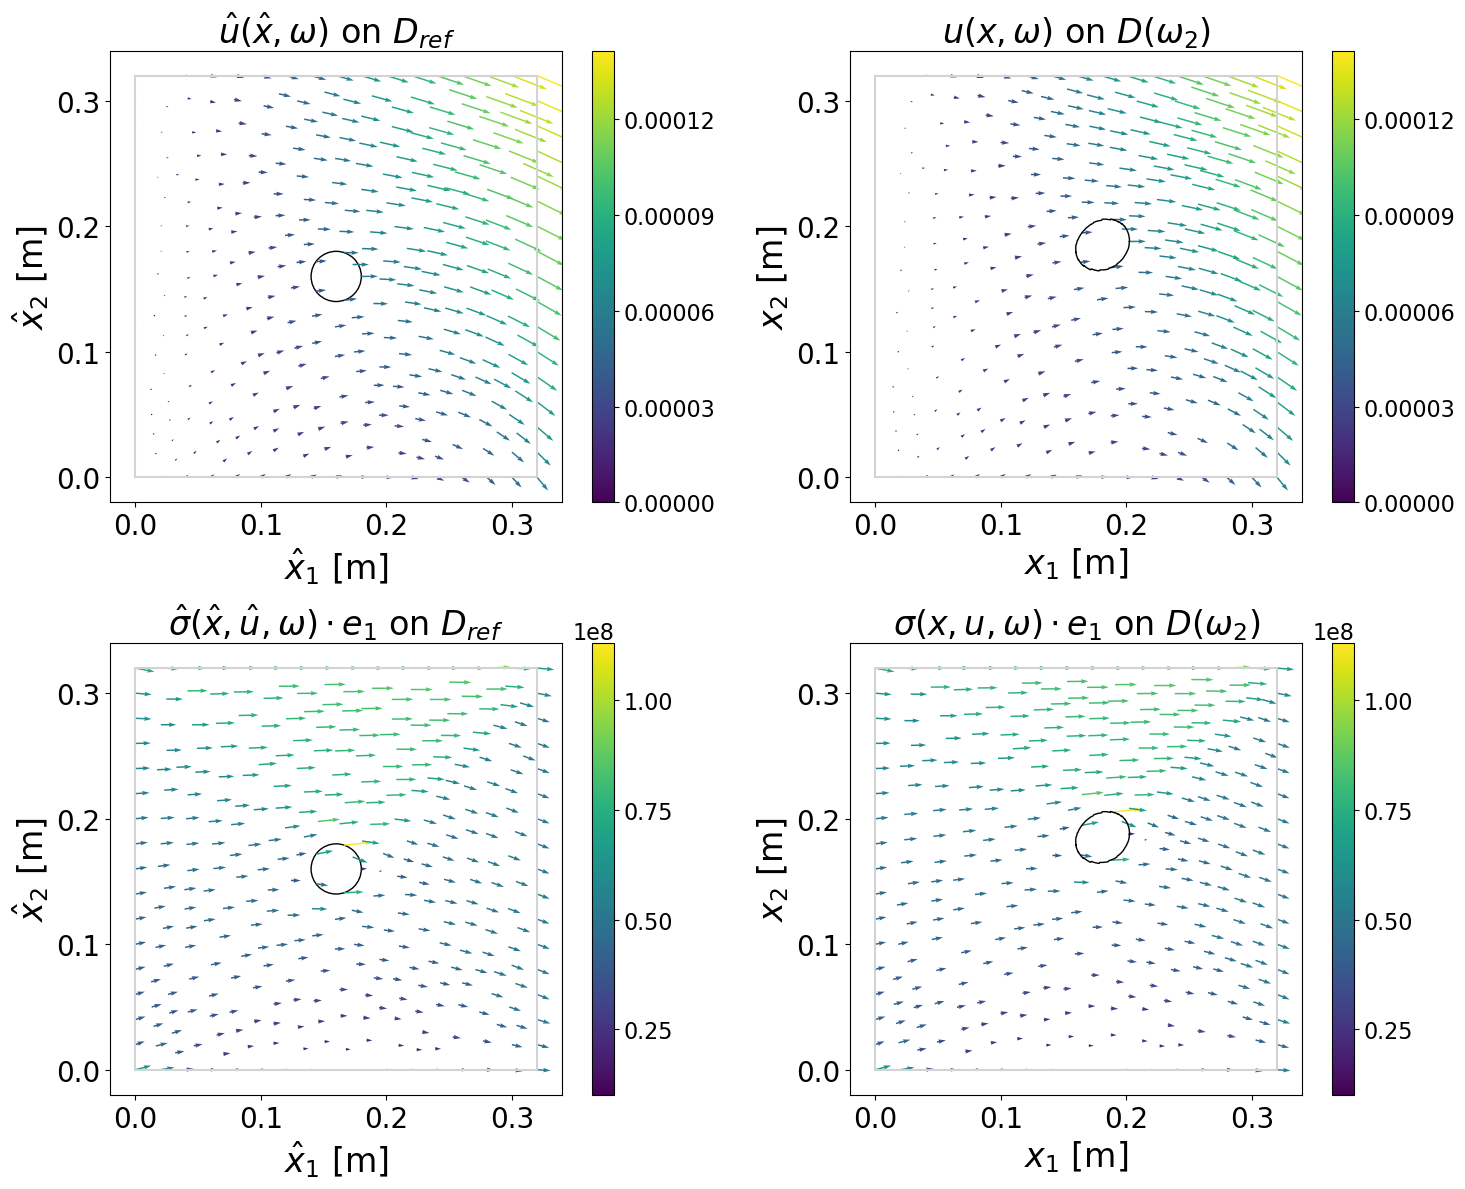

In [51]:
# Plot single sample results

start_time = time.time()
u_hat_data, sigma_hat_data = solve_model(mesh_resolution, omega1, omega2, q, randomFieldE, randomFieldVBar)
print(f"Time for one sample: {time.time() - start_time:.2f} seconds")

mesh = create_reference_mesh(mesh_resolution)
perturbed_mesh = perturb_mesh(mesh, omega2, 0.02, randomFieldVBar)

V = fe.VectorFunctionSpace(mesh, 'P', 1)
V_sigma = fe.TensorFunctionSpace(mesh, 'P', 1)
V_pert = fe.VectorFunctionSpace(perturbed_mesh, 'P', 1)
V_sigma_pert = fe.TensorFunctionSpace(perturbed_mesh, 'P', 1)

u_hat = fe.Function(V)
u_hat.vector()[:] = u_hat_data
u = fe.Function(V_pert)
u.vector()[:] = u_hat_data
sigma_hat = fe.Function(V_sigma)
sigma_hat.vector()[:] = sigma_hat_data
sigma = fe.Function(V_sigma_pert)
sigma.vector()[:] = sigma_hat_data


# Plot
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# u_hat
ax = plt.subplot(2, 2, 1)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u_hat)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{u}(\hat{x}, \omega)$ on $D_{ref}$', fontsize=24)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# u
ax = plt.subplot(2, 2, 2)
plt.plot(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], color='black', linewidth=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$u(x, \omega)$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma_hat
ax = plt.subplot(2, 2, 3)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma_hat[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{\sigma}(\hat{x}, \hat{u}, \omega) \cdot e_1$ on $D_{ref}$', fontsize=24)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma
ax = plt.subplot(2, 2, 4)
plt.plot(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], color='black', linewidth=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\sigma(x, u, \omega) \cdot e_1$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()

/Users/elias/git/Masterthesis/steel_plate_problem/sp_6/sp_6_helper.py:1250: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


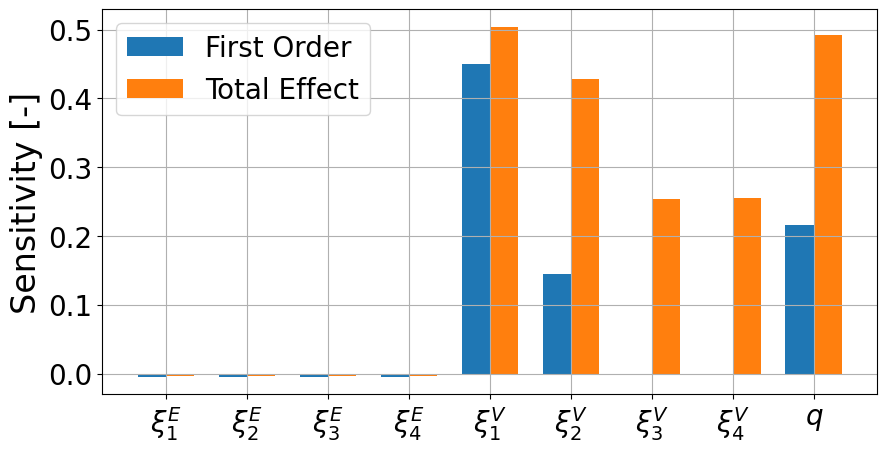

Sample size: 18900
S_single: [-4.69261096e-03 -4.69261096e-03 -4.69261096e-03 -4.51071502e-03
  4.49727996e-01  1.44684133e-01 -1.38535817e-04 -1.28612659e-03
  2.15518147e-01]
S_total: [-0.0030278  -0.0030278  -0.0030278  -0.00293178  0.50389756  0.42887583
  0.25311412  0.25526228  0.49271229]


In [1]:
# Test Sobol Index Analysis U Hat
from sp_6_helper import sp_6_sobol_calc_indices_u_hat, sp_6_plot_sobols
S_single, S_total, mc_sample_size = sp_6_sobol_calc_indices_u_hat(fem_res=14, kl_res_e=6, kl_res_v=6, size_of_xi_e=4, size_of_xi_v=4)
sp_6_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)
print(f"S_single: {S_single}")
print(f"S_total: {S_total}")

sigma_hat_A(P_hat): [86802447.40438886  2273530.98779602  2273530.98779602  8800320.87531755]
sigma_hat_A(P_hat): [46963664.43949842  1147850.3152716   1147850.3152716   4575375.72152987]
sigma_hat_A(P_hat): [83934198.04284023   414179.76124915   414179.76124915  6915494.18646744]
sigma_hat_A(P_hat): [75362203.50581738  3613601.64842631  3613601.64842631  9569177.53908675]
sigma_hat_A(P_hat): [1.27890437e+08 3.66739122e+06 3.66739122e+06 1.29198716e+07]
sigma_hat_A(P_hat): [73844833.01772763  6201895.54607228  6201895.54607228 10421718.31368658]
sigma_hat_A(P_hat): [89245044.094211    2003999.43652092  2003999.43652092  9960169.65170138]
sigma_hat_A(P_hat): [65733619.23440797  3606201.32524141  3606201.32524141  8151398.71600971]
sigma_hat_A(P_hat): [75446808.26349404  1854983.69629704  1854983.69629704  8523980.93525609]
sigma_hat_A(P_hat): [1.15462225e+08 4.03200370e+06 4.03200370e+06 1.65467380e+07]
sigma_hat_A(P_hat): [56002628.01485085  3105983.80097182  3105983.80097182  5837133.

/Users/elias/git/Masterthesis/steel_plate_problem/sp_6/sp_6_helper.py:1250: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


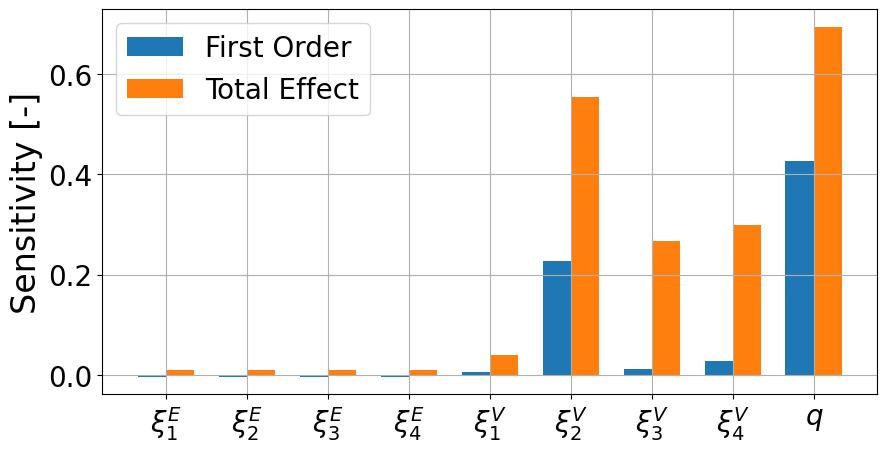

Sample size: 18900


In [2]:
# Test Sobol Index Analysis Sigma Hat
from sp_6_helper import sp_6_sobol_calc_indices_sigma_hat, sp_6_plot_sobols
S_single, S_total, mc_sample_size = sp_6_sobol_calc_indices_sigma_hat(fem_res=14, kl_res_e=6, kl_res_v=6, size_of_xi_e=4, size_of_xi_v=4)
sp_6_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)


Building point search tree to accelerate distance queries.
Computed bounding box tree with 255 nodes for 128 points.


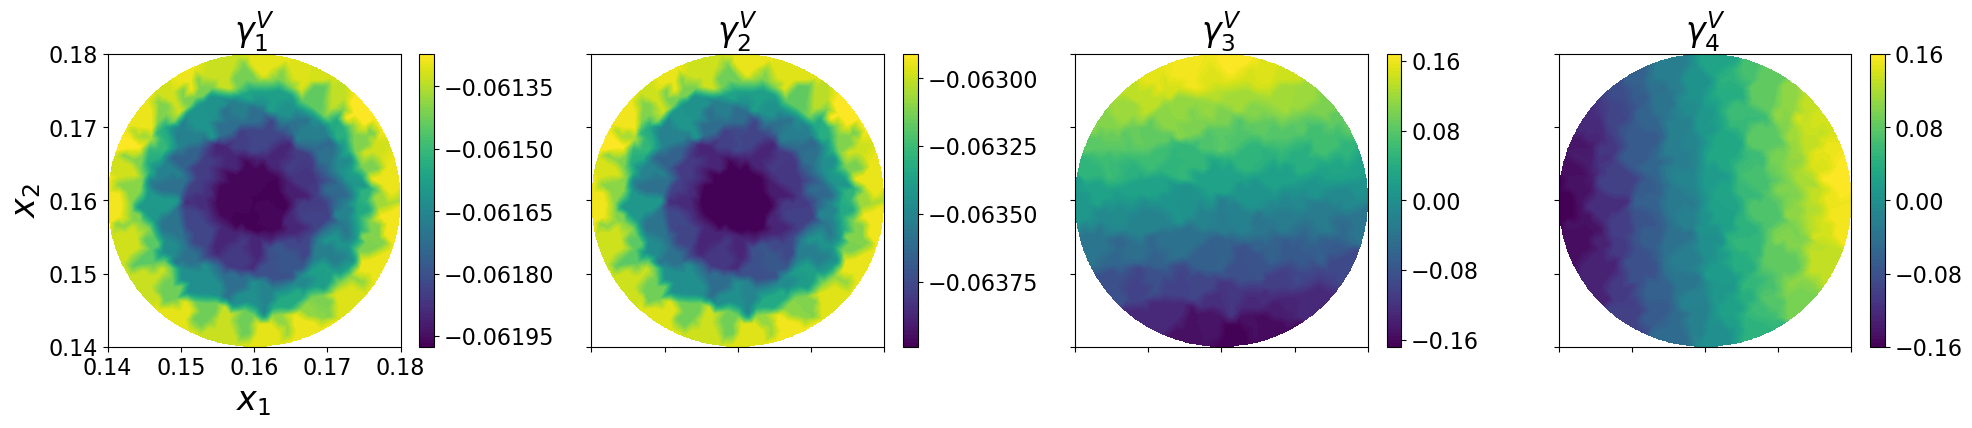

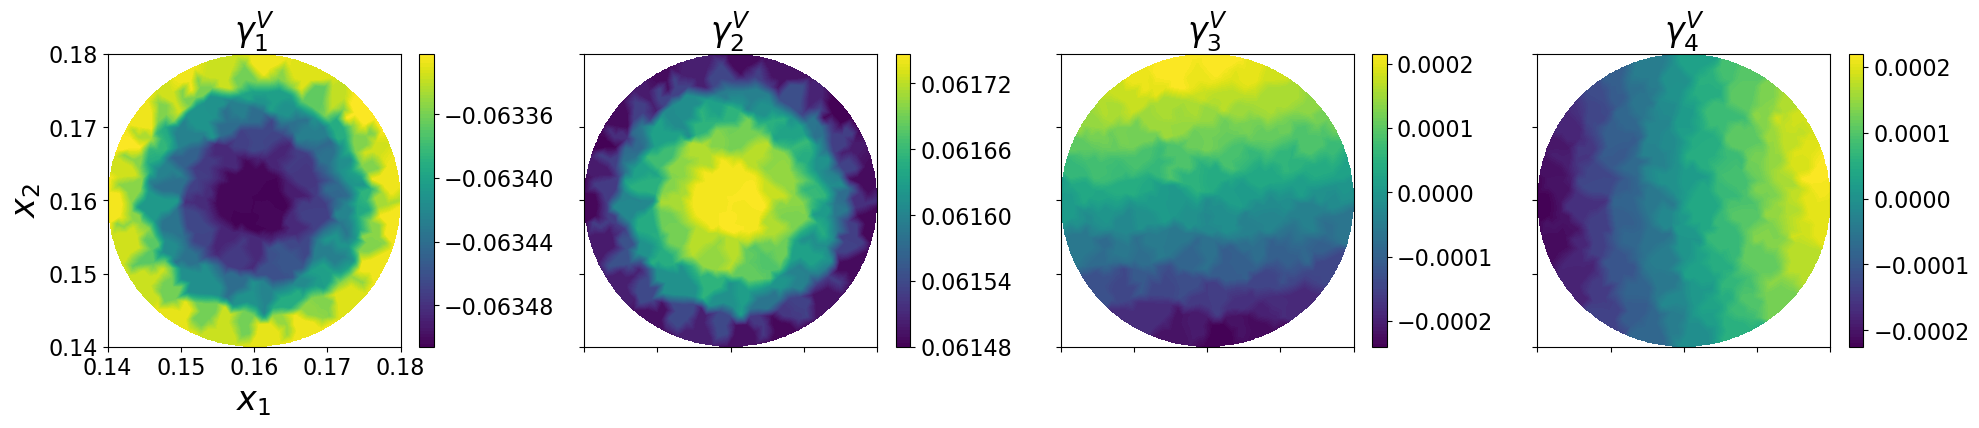

Eigenvalue 1: 0.07343682811259304
Eigenvalue 2: 0.04875201360012703
Eigenvalue 3: 0.0004695046266099265
Eigenvalue 4: 0.0004692252015292267


In [23]:
# Eigenfunctions of Random Field VBar
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from sp_6_helper import calculate_randomFieldVBar, calculate_randomFieldE, create_reference_mesh
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import fenics as fe
import mshr

randomFieldVBar = calculate_randomFieldVBar(6)

eval_eigenfunc_k = lambda x, k: np.array([sum([randomFieldVBar.basis_functions[j].function(np.array(x) - np.array([0.16, 0.16])) * randomFieldVBar.eigenvectors[j, k] for j in range(randomFieldVBar.N)]), 
                                          sum([randomFieldVBar.basis_functions[j].function(np.array(x) - np.array([0.16, 0.16])) * randomFieldVBar.eigenvectors[j + randomFieldVBar.N, k] for j in range(randomFieldVBar.N)])])

domain = mshr.Circle(fe.Point(0.16, 0.16), 0.02)
mesh = mshr.generate_mesh(domain, 20)

x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[0.14:0.18:500j, 0.14:0.18:500j]

columns = 4
# First component
fig, axs = plt.subplots(1, columns, figsize=(20, 4))

for k in range(columns):
    ax = axs[k]
    z_values = []
    for i in range(len(x_coords)):
        z_values.append(eval_eigenfunc_k([x_coords[i], y_coords[i]], k)[0])

    grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
    cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    cbar = plt.colorbar(cp)
    cbar.ax.tick_params(labelsize=16)
    cbar.locator = MaxNLocator(nbins=5)
    cbar.update_ticks()
    ax.set_title(rf'$\gamma_{k+1}^V$', fontsize=24)
    if k == 0:
        ax.set_xlabel(r'$x_1$', fontsize=24)
        ax.set_ylabel(r'$x_2$', fontsize=24)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


# Second component
fig, axs = plt.subplots(1, columns, figsize=(20, 4))
for k in range(columns):
    ax = axs[k]
    z_values = []
    for i in range(len(x_coords)):
        z_values.append(eval_eigenfunc_k([x_coords[i], y_coords[i]], k)[1])
    
    grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
    cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    cbar = plt.colorbar(cp)
    cbar.ax.tick_params(labelsize=16)
    cbar.locator = MaxNLocator(nbins=5)
    cbar.update_ticks()
    ax.set_title(rf'$\gamma_{k+1}^V$', fontsize=24)
    if k == 0:
        ax.set_xlabel(r'$x_1$', fontsize=24)
        ax.set_ylabel(r'$x_2$', fontsize=24)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_aspect('equal')
    

plt.tight_layout()
plt.show()

# Print first 4 eigenvalues
for i in range(4):
    print(f"Eigenvalue {i+1}: {randomFieldVBar.eigenvalues[i]}")

Building point search tree to accelerate distance queries.
Computed bounding box tree with 217 nodes for 109 points.


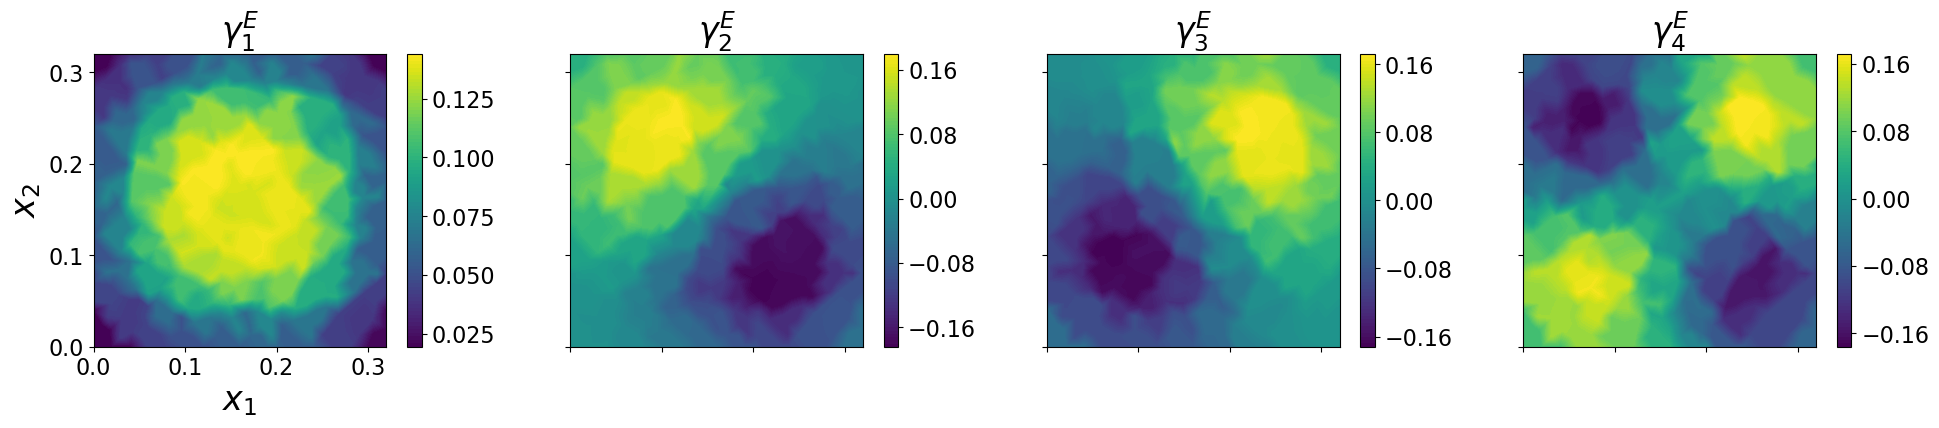

Eigenvalue 1: 5.032855936243348e-05
Eigenvalue 2: 4.499635820903043e-05
Eigenvalue 3: 4.464696738248568e-05
Eigenvalue 4: 3.9314862595714174e-05


In [24]:
# Eigenfunctions of Random Field E
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from sp_6_helper import calculate_randomFieldE, calculate_randomFieldE, create_reference_mesh
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

randomFieldE = calculate_randomFieldE(6)

eval_eigenfunc_k = lambda x, k: sum([randomFieldE.basis_functions[j].function(x) * randomFieldE.eigenvectors[j, k] for j in range(randomFieldE.N)])

mesh = create_reference_mesh(20)

x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[0:0.32:500j, 0:0.32:500j]

columns = 4
# First component
fig, axs = plt.subplots(1, columns, figsize=(20, 4))

for k in range(columns):
    ax = axs[k]
    z_values = []
    for i in range(len(x_coords)):
        z_values.append(eval_eigenfunc_k([x_coords[i], y_coords[i]], k))
    
    grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
    cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    cbar = plt.colorbar(cp)
    cbar.ax.tick_params(labelsize=16)
    cbar.locator = MaxNLocator(nbins=5)
    cbar.update_ticks()
    ax.set_title(rf'$\gamma_{k+1}^E$', fontsize=24)
    if k == 0:
        ax.set_xlabel(r'$x_1$', fontsize=24)
        ax.set_ylabel(r'$x_2$', fontsize=24)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# Print first 4 eigenvalues
for i in range(4):
    print(f"Eigenvalue {i+1}: {randomFieldE.eigenvalues[i]}")